In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from PIL  import Image
import os
import math
import numpy as np

In [3]:
# b,g,r to r,g,b
def BGR2RGB(image):
    b,g,r = cv2.split(image)
    rgb_image = cv2.merge([r,g,b])
    return rgb_image

In [108]:
# 이미지 dpi 확인 후 불러오기

def checkImageDpi(path, img_name, image_path):
    img = Image.open(image_path)
    try:
        for dpi in img.info['dpi']:
            if dpi >= 300:
                img = cv2.imread(image_path)
                return img

            new_img_name = img_name[:-4] + '_dpi300.jpg' # 300 미만시 300으로 설정 후 저장
            new_path = os.path.join(path, new_img_name) 
            dpi = (300,300)
            img.save(new_path, dpi= dpi)
            img = cv2.imread(new_path)
            return img
    except:
        new_img_name = img_name[:-4] + '_dpi300.jpg' # 300 미만시 300으로 설정 후 저장
        new_path = os.path.join(path, new_img_name) 
        dpi = (300,300)
        img.save(new_path, dpi= dpi)
        img = cv2.imread(new_path)
        return img

In [ ]:
# 이미지 대비도 올리기
def preprocessing_contrast():
    

In [134]:
reader = easyocr.Reader(['en'])

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

def inpaint_text(img):
    # case: 한글경로 
    #img_array = np.fromfile(img_path, np.uint8)
    #img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    
    # generate (word, box) tuples 
    readtext_result = reader.readtext(img, min_size = 7)
    mask = np.zeros(img.shape[:2], dtype="uint8")
    box_list=[]
    box_list.extend(row[0] for row in readtext_result)
    
    for box in box_list:
        x0, y0 = box[0]
        x1, y1 = box[1]
        x2, y2 = box[2]
        x3, y3 = box[3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        #thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        thickness = int(abs(x2 - x1) + abs(y2 - y1) )
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
                 
    return(img)

In [138]:
# image path
path = 'C:\\Users\\HP\Desktop\\worksapces\\image-editing\\EDA\\image_data'
img_name = 'poster (11).jpg'
full_path = os.path.join(path, img_name)

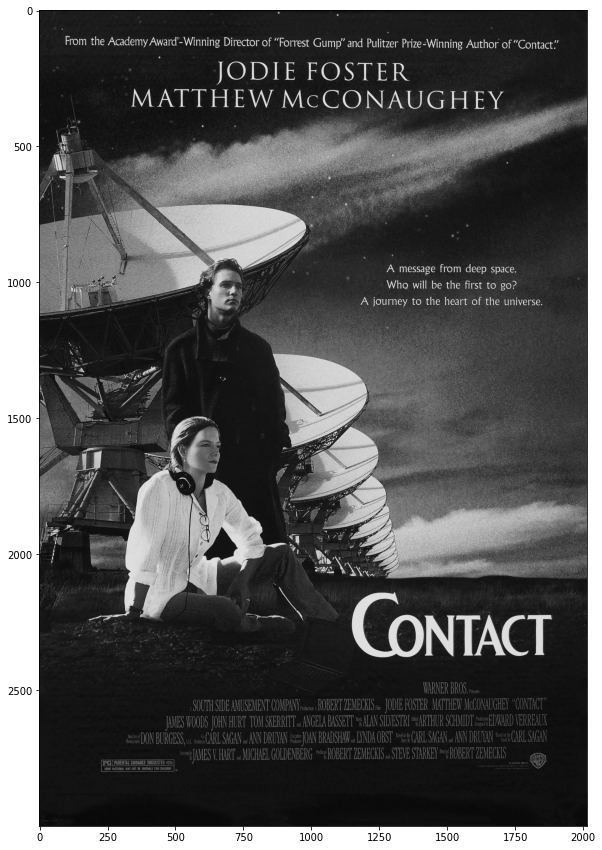

In [139]:
# 이미지 불러오기
img = checkImageDpi(path, img_name, full_path)

img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백

plt.figure(figsize=(10,15))
plt.imshow(img_grey, 'gray')
    

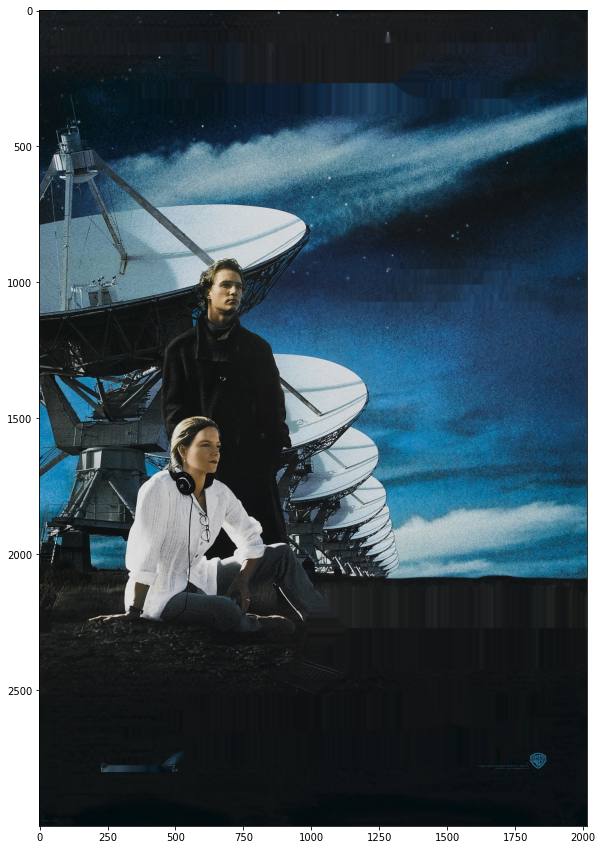

In [140]:
# inpaint 작업
img_inpainted = inpaint_text(img)
plt.figure(figsize=(10,15))
plt.imshow(BGR2RGB(img_inpainted))

In [141]:
def steps(image_name):
    # image path
    path = 'C:\\Users\\HP\Desktop\\worksapces\\image-editing\\EDA\\image_data'
    img_name = image_name
    full_path = os.path.join(path, img_name)

    # 이미지 불러오기
    img = checkImageDpi(path, img_name, full_path)

    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백

    plt.figure(figsize=(10,15))
    plt.imshow(img_grey, 'gray')

    # inpaint 작업
    img_inpainted = inpaint_text(img)
    plt.figure(figsize=(10,15))
    plt.imshow(BGR2RGB(img_inpainted))

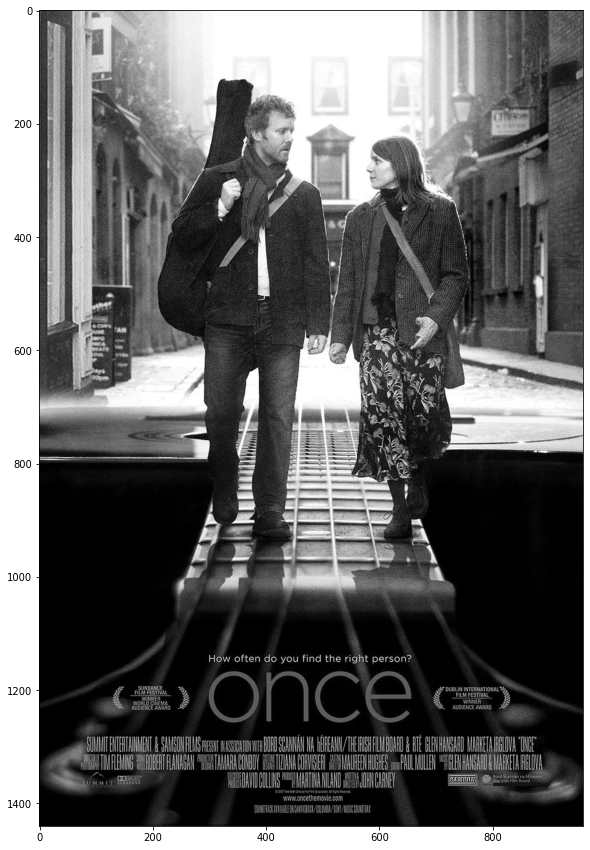

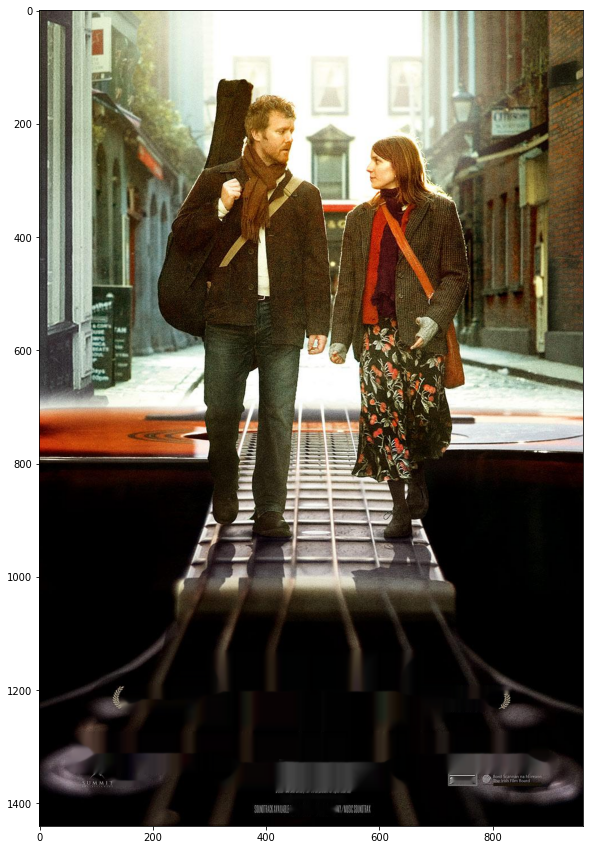

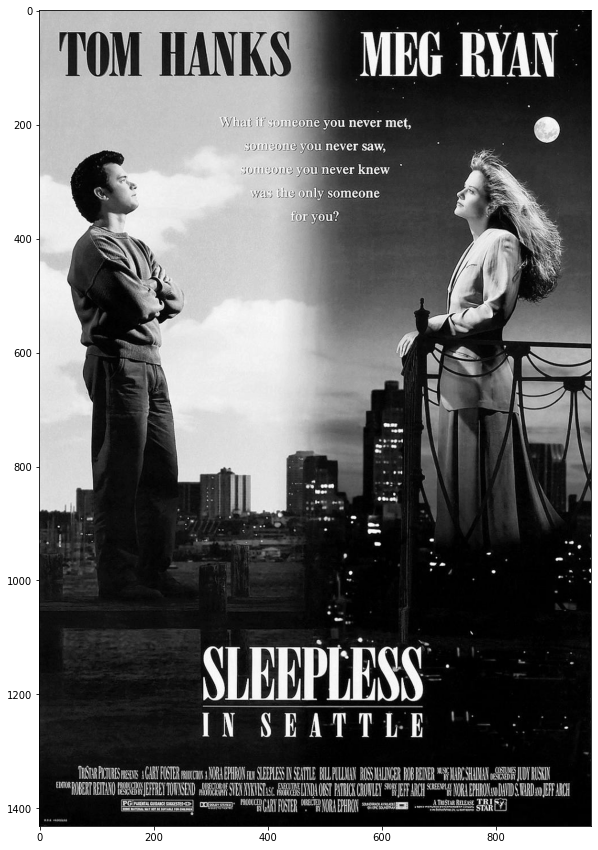

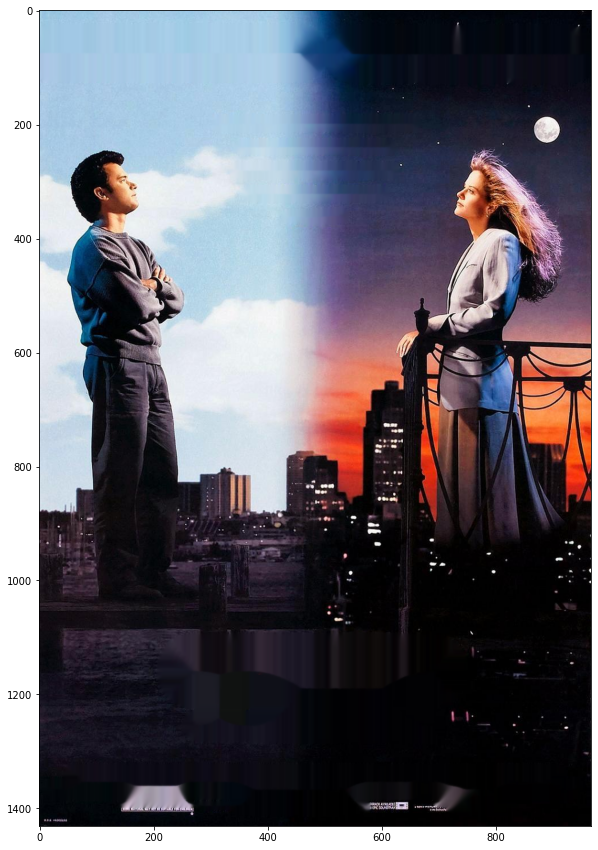

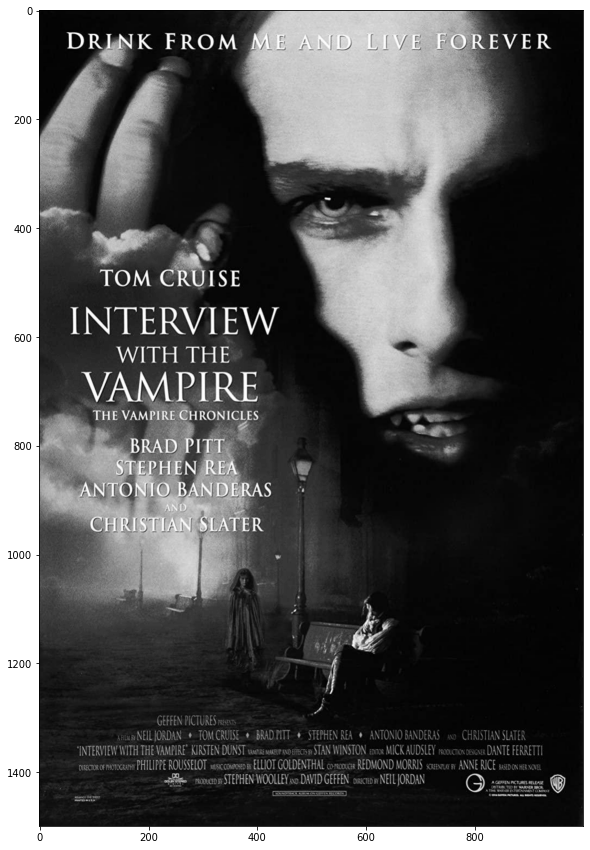

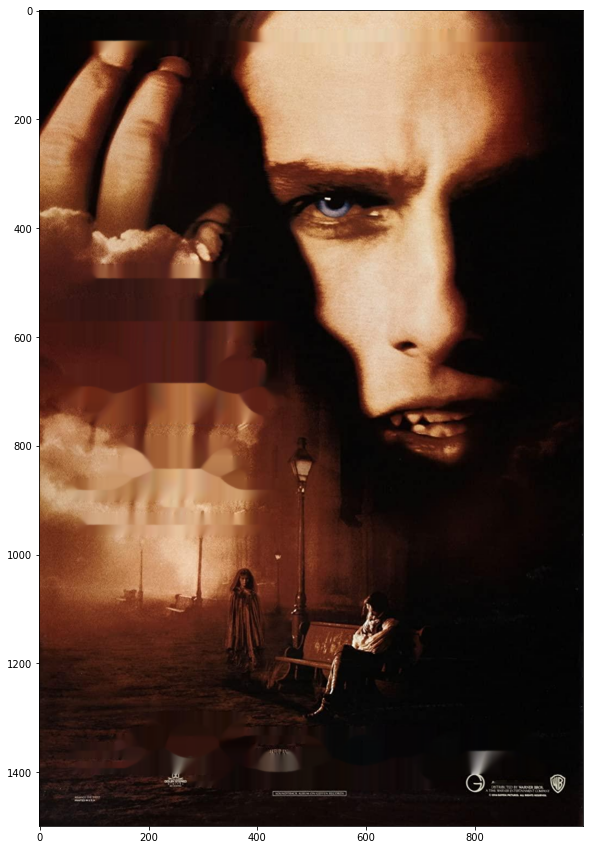

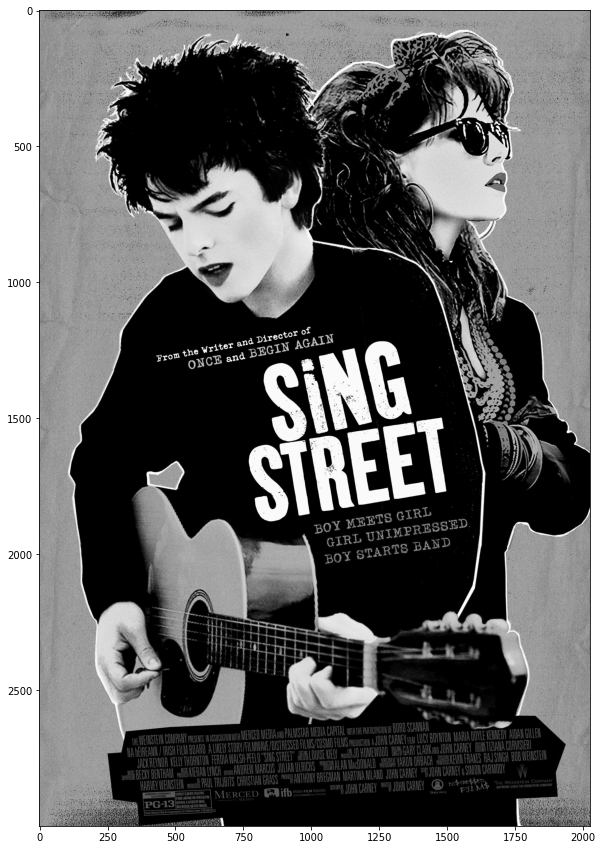

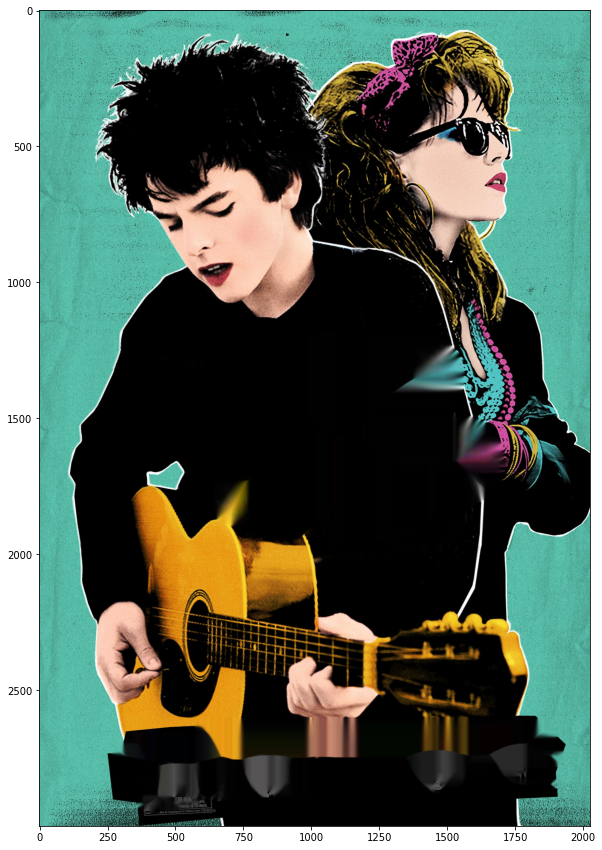

In [143]:
steps('poster (3).jpg')
steps('poster (7).jpg')
steps('poster (6).jpg')
steps('poster (2).jpg')

# 개선점
##### 1. 시간이 너무 걸림 -> 알고리즘 수정 필요
##### 2. 다른 inpaint 모델 사용 시도 필요

# tesseract 전처리 tip
#### 사전, 단어 목록 및 패턴 *(load_system_dawg, load_freq_dawg) 
#### 누락된 테두리(missing borders)
#### 투명도. 알파 채널(transparency/ alpha channel)
#### 스캔 테두리 제거 (scanning border removal)
#### 회전 / 기울기 보정 (rotation / deskewing)
#### noise removal
#### rescaling ( 크기 조정)
#### -> Tesseract expects images at around 300 dpi or more and standard dpi for Windows is 96. Which means you need to rescale the image to 300%. After that, the results improve dramatically.
출처 : https://stackoverflow.com/questions/4209284/best-way-to-recognize-characters-in-screenshot
#### 이진화 (흑백이미지로 binarizaiotn)
#### 이미지 반전 ( inverting images)
#### 이미지 처리 (image processing)
참고 :https://ddolcat.tistory.com/954

#### 디지털 이미지 관련 참고 사이트
https://m.blog.naver.com/soulcreator/221247716236